# bonobo tracks data extract

In [1]:
import spotipy
import json
import time
import sys
import pandas as pd
import numpy as np

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = 'e2259109005e4bca90a98a851f042e7e'
client_secret = '7a39ee07c96d451298fa86308bd66ae0'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
name = "bonobo" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0cmWgDlu9CwTgxPhf403hb'},
  'href': 'https://api.spotify.com/v1/artists/0cmWgDlu9CwTgxPhf403hb',
  'id': '0cmWgDlu9CwTgxPhf403hb',
  'name': 'Bonobo',
  'type': 'artist',
  'uri': 'spotify:artist:0cmWgDlu9CwTgxPhf403hb'}]

In [5]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')

#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

In [6]:
album_uris

['spotify:album:6Zs42QVS22zdzLXh2v0sHf',
 'spotify:album:0oVZx9Ax0CduKP4UIEi9Yj',
 'spotify:album:4vi1efZTY8nAEmKcDXhp23',
 'spotify:album:2T64N96AVfsrRFJCUXQEoZ',
 'spotify:album:6tEOuMrJ6gsmZ2vB2P1NV7',
 'spotify:album:5UXaJ1GCotZyz6b8ucOJD1',
 'spotify:album:75mOIzgjMsFLN5hyQlpsy8',
 'spotify:album:5mUpTgKcEzfX6to5BReBdE',
 'spotify:album:343LOP7AV1WrvUON3J4xia',
 'spotify:album:6B6cN1gyobgdGESQ1RSjix',
 'spotify:album:7sN6lCgPf1rbZYmA3edMKv',
 'spotify:album:2tcn5o1g4FuVRuMGjn7G4v',
 'spotify:album:5DxzzkiFrE2jBEzunU586c',
 'spotify:album:43WSSYRovDf2G7qjKgl1mc',
 'spotify:album:3DYh52KdBhnAa4CZoj4gqN',
 'spotify:album:5m1RkwKeU7MV0Ni6PH2lPy',
 'spotify:album:1VlLLqC0tugMgQEUU4K6mq',
 'spotify:album:0DgI3WyjwKrCCZsbReu6IS',
 'spotify:album:5HLoU4oijKdSIFOk2o7mYn',
 'spotify:album:3YbS3d0BltQNfe0jWexUuI']

In [7]:
album_uris = ['spotify:album:0oVZx9Ax0CduKP4UIEi9Yj','spotify:album:1VlLLqC0tugMgQEUU4K6mq','spotify:album:5HLoU4oijKdSIFOk2o7mYn']

In [8]:
album_names

['fabric presents Bonobo (DJ Mix)',
 'Migration',
 'Migration',
 'Migration',
 'The North Borders Tour. — Live.',
 'The North Borders Tour. — Live.',
 'Late Night Tales: Bonobo',
 'The North Border',
 'The North Borders',
 'The North Borders',
 'The North Borders',
 'Black Sands Remixed',
 'Black Sands Remixed',
 'Black Sands Remixed (Bonus Track Version)',
 'Black Sands',
 'Black Sands',
 'Black Sands',
 'Days To Come',
 'Days To Come',
 'Recurring - The Live Sessions']

In [9]:
album_names = ['Migration','Black Sands','Days To Come']

### get track ids

In [10]:
tids = []
t_names = []
for i, t in enumerate(result['tracks']['items']):
    print(' ', i, t['name'])
    t_names.append(t['name'])
    tids.append(t['uri'])

  0 Linked
  1 Cirrus
  2 Break Apart
  3 Second Sun
  4 Kerala
  5 Kong
  6 Bambro Koyo Ganda
  7 Ibrik
  8 Kiara
  9 Something In The Air - Bonobo Remix


In [11]:
tids

['spotify:track:3rCtueI7qBN2kZBZnXuk5K',
 'spotify:track:2lJ4d8MCT6ZlDRHKJ1br14',
 'spotify:track:2pYvd6cHcAIMAM6xMD6nok',
 'spotify:track:16ikmfoT1249gG3pzPvnYt',
 'spotify:track:5DAjrJqXqYtgr67pVhmUeR',
 'spotify:track:7Cg3F9ZsZ2TYUnlza49NYh',
 'spotify:track:5EGJ7e7frJjYja6H4afzoT',
 'spotify:track:0E7S1k9M1KshLISVC2EP1M',
 'spotify:track:7sqii6BhIDpJChYpU3WjwS',
 'spotify:track:6wLDbkpdZEElEdKo9Wt010']

In [12]:
t_names

['Linked',
 'Cirrus',
 'Break Apart',
 'Second Sun',
 'Kerala',
 'Kong',
 'Bambro Koyo Ganda',
 'Ibrik',
 'Kiara',
 'Something In The Air - Bonobo Remix']

In [13]:
start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
print("time to get the data = ",delta)

time to get the data =  0.30271363258361816


In [14]:
len(features)

10

In [15]:
features[0]

{'danceability': 0.713,
 'energy': 0.725,
 'key': 6,
 'loudness': -9.951,
 'mode': 1,
 'speechiness': 0.0385,
 'acousticness': 0.539,
 'instrumentalness': 0.886,
 'liveness': 0.111,
 'valence': 0.24,
 'tempo': 122.041,
 'type': 'audio_features',
 'id': '3rCtueI7qBN2kZBZnXuk5K',
 'uri': 'spotify:track:3rCtueI7qBN2kZBZnXuk5K',
 'track_href': 'https://api.spotify.com/v1/tracks/3rCtueI7qBN2kZBZnXuk5K',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3rCtueI7qBN2kZBZnXuk5K',
 'duration_ms': 369462,
 'time_signature': 4}

In [16]:
features[0]['danceability']

0.713

# check about popularity **************************

In [17]:
t_popularity = []
for track in tids:
    pop = sp.track(track)
    # pop is a dict with many attributes, we are interested at the moment in popularity
    t_popularity.append(pop['popularity'])

In [18]:
def get_tracks_features_into_dict(tracks_features):
    t_id = []
    t_danceability = []
    t_energy = []
    t_loudness = []
    t_speechiness = []
    t_acousticness = []
    t_instrumentalness = []
    t_liveness = []
    t_valence = []
    t_tempo = []
    t_duration_ms = []
    for i in range(len(t_names)):
        t_id.append(tracks_features[i]['id'])
        t_danceability.append(tracks_features[i]['danceability'])
        t_energy.append(tracks_features[i]['energy'])
        t_loudness.append(tracks_features[i]['loudness'])
        t_speechiness.append(tracks_features[i]['speechiness'])
        t_acousticness.append(tracks_features[i]['acousticness'])
        t_instrumentalness.append(tracks_features[i]['instrumentalness'])
        t_liveness.append(tracks_features[i]['liveness'])
        t_valence.append(tracks_features[i]['valence'])
        t_tempo.append(tracks_features[i]['tempo'])
        t_duration_ms.append(tracks_features[i]['duration_ms'])
    #create a dictionary    
    d = {'id':t_id,
         'danceability':t_danceability,
         'energy':t_energy,
         'loudness':t_loudness,
         'speechiness':t_speechiness,
         'acousticness':t_acousticness,
         'instrumentalness':t_instrumentalness,
         'liveness':t_liveness,
         'valence':t_valence,
         'tempo':t_tempo,
         'duration_ms':t_duration_ms
    }
    
    return d

In [19]:
songs_features_dict = get_tracks_features_into_dict(features)

In [20]:
songs_features_dict

{'id': ['3rCtueI7qBN2kZBZnXuk5K',
  '2lJ4d8MCT6ZlDRHKJ1br14',
  '2pYvd6cHcAIMAM6xMD6nok',
  '16ikmfoT1249gG3pzPvnYt',
  '5DAjrJqXqYtgr67pVhmUeR',
  '7Cg3F9ZsZ2TYUnlza49NYh',
  '5EGJ7e7frJjYja6H4afzoT',
  '0E7S1k9M1KshLISVC2EP1M',
  '7sqii6BhIDpJChYpU3WjwS',
  '6wLDbkpdZEElEdKo9Wt010'],
 'danceability': [0.713,
  0.64,
  0.648,
  0.378,
  0.529,
  0.542,
  0.723,
  0.738,
  0.595,
  0.728],
 'energy': [0.725,
  0.844,
  0.458,
  0.178,
  0.739,
  0.749,
  0.571,
  0.512,
  0.788,
  0.71],
 'loudness': [-9.951,
  -8.412,
  -15.169,
  -15.348,
  -9.578,
  -8.333,
  -10.22,
  -12.924,
  -10.128,
  -9.903],
 'speechiness': [0.0385,
  0.0374,
  0.0311,
  0.0303,
  0.0718,
  0.0277,
  0.0572,
  0.0668,
  0.363,
  0.0535],
 'acousticness': [0.539,
  0.395,
  0.864,
  0.958,
  0.0237,
  0.173,
  0.21,
  0.257,
  0.195,
  0.0524],
 'instrumentalness': [0.886,
  0.933,
  0.0944,
  0.802,
  0.607,
  0.942,
  0.334,
  0.879,
  0.202,
  0.905],
 'liveness': [0.111,
  0.0827,
  0.366,
  0.11,
  0.171

## create dataframe

In [21]:
df = pd.DataFrame(songs_features_dict)
df.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,3rCtueI7qBN2kZBZnXuk5K,0.713,0.725,-9.951,0.0385,0.5390,0.8860,0.1110,0.2400,122.041,369462
1,2lJ4d8MCT6ZlDRHKJ1br14,0.640,0.844,-8.412,0.0374,0.3950,0.9330,0.0827,0.3640,119.042,352247
2,2pYvd6cHcAIMAM6xMD6nok,0.648,0.458,-15.169,0.0311,0.8640,0.0944,0.3660,0.0848,119.960,274693
3,16ikmfoT1249gG3pzPvnYt,0.378,0.178,-15.348,0.0303,0.9580,0.8020,0.1100,0.0591,77.263,223720
4,5DAjrJqXqYtgr67pVhmUeR,0.529,0.739,-9.578,0.0718,0.0237,0.6070,0.1710,0.1380,124.750,237547


In [22]:
df.insert(11, "popularity", pd.Series(t_popularity) , True) 
df.insert(12, "track_type", 'chill' , True)
df = df.set_index('id')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_type
id,,,,,,,,,,,,
3rCtueI7qBN2kZBZnXuk5K,0.713,0.725,-9.951,0.0385,0.5390,0.8860,0.1110,0.2400,122.041,369462,65,chill
2lJ4d8MCT6ZlDRHKJ1br14,0.640,0.844,-8.412,0.0374,0.3950,0.9330,0.0827,0.3640,119.042,352247,61,chill
2pYvd6cHcAIMAM6xMD6nok,0.648,0.458,-15.169,0.0311,0.8640,0.0944,0.3660,0.0848,119.960,274693,60,chill
16ikmfoT1249gG3pzPvnYt,0.378,0.178,-15.348,0.0303,0.9580,0.8020,0.1100,0.0591,77.263,223720,57,chill
5DAjrJqXqYtgr67pVhmUeR,0.529,0.739,-9.578,0.0718,0.0237,0.6070,0.1710,0.1380,124.750,237547,61,chill
7Cg3F9ZsZ2TYUnlza49NYh,0.542,0.749,-8.333,0.0277,0.1730,0.9420,0.3150,0.6740,94.031,237827,58,chill
5EGJ7e7frJjYja6H4afzoT,0.723,0.571,-10.220,0.0572,0.2100,0.3340,0.1330,0.1850,115.518,302428,58,chill
0E7S1k9M1KshLISVC2EP1M,0.738,0.512,-12.924,0.0668,0.2570,0.8790,0.0824,0.0867,123.010,350055,59,chill
7sqii6BhIDpJChYpU3WjwS,0.595,0.788,-10.128,0.3630,0.1950,0.2020,0.1530,0.4140,97.012,230307,54,chill


In [23]:
df

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_type
0,3rCtueI7qBN2kZBZnXuk5K,0.713,0.725,-9.951,0.0385,0.5390,0.8860,0.1110,0.2400,122.041,369462,65,chill
1,2lJ4d8MCT6ZlDRHKJ1br14,0.640,0.844,-8.412,0.0374,0.3950,0.9330,0.0827,0.3640,119.042,352247,61,chill
2,2pYvd6cHcAIMAM6xMD6nok,0.648,0.458,-15.169,0.0311,0.8640,0.0944,0.3660,0.0848,119.960,274693,60,chill
3,16ikmfoT1249gG3pzPvnYt,0.378,0.178,-15.348,0.0303,0.9580,0.8020,0.1100,0.0591,77.263,223720,57,chill
4,5DAjrJqXqYtgr67pVhmUeR,0.529,0.739,-9.578,0.0718,0.0237,0.6070,0.1710,0.1380,124.750,237547,61,chill
5,7Cg3F9ZsZ2TYUnlza49NYh,0.542,0.749,-8.333,0.0277,0.1730,0.9420,0.3150,0.6740,94.031,237827,58,chill
6,5EGJ7e7frJjYja6H4afzoT,0.723,0.571,-10.220,0.0572,0.2100,0.3340,0.1330,0.1850,115.518,302428,58,chill
7,0E7S1k9M1KshLISVC2EP1M,0.738,0.512,-12.924,0.0668,0.2570,0.8790,0.0824,0.0867,123.010,350055,59,chill
8,7sqii6BhIDpJChYpU3WjwS,0.595,0.788,-10.128,0.3630,0.1950,0.2020,0.1530,0.4140,97.012,230307,54,chill
9,6wLDbkpdZEElEdKo9Wt010,0.728,0.710,-9.903,0.0535,0.0524,0.9050,0.0360,0.1580,118.002,366989,56,chill


In [24]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.623400,0.627400,-10.996600,0.077730,0.366710,0.658440,0.156010,0.240360,111.062900,294527.500000,58.900000
std,0.115214,0.200957,2.571049,0.101453,0.324458,0.328635,0.105132,0.192779,15.956046,60860.693625,3.071373
min,0.378000,0.178000,-15.348000,0.027700,0.023700,0.094400,0.036000,0.059100,77.263000,223720.000000,54.000000
25%,0.555250,0.526750,-12.248000,0.032675,0.178500,0.402250,0.089525,0.099525,101.638500,237617.000000,57.250000
50%,0.644000,0.717500,-10.039500,0.046000,0.233500,0.840500,0.122000,0.171500,118.522000,288560.500000,58.500000
75%,0.720500,0.746500,-9.659250,0.064400,0.503000,0.900250,0.166500,0.333000,121.520750,351699.000000,60.750000
max,0.738000,0.844000,-8.333000,0.363000,0.958000,0.942000,0.366000,0.674000,124.750000,369462.000000,65.000000


# DISTRIBUTIONS

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']

In [27]:
fig_size

[6.0, 4.0]

In [28]:
# SET WIDTH AND HEIGHT
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

###  duration ms dist

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'duration_min')

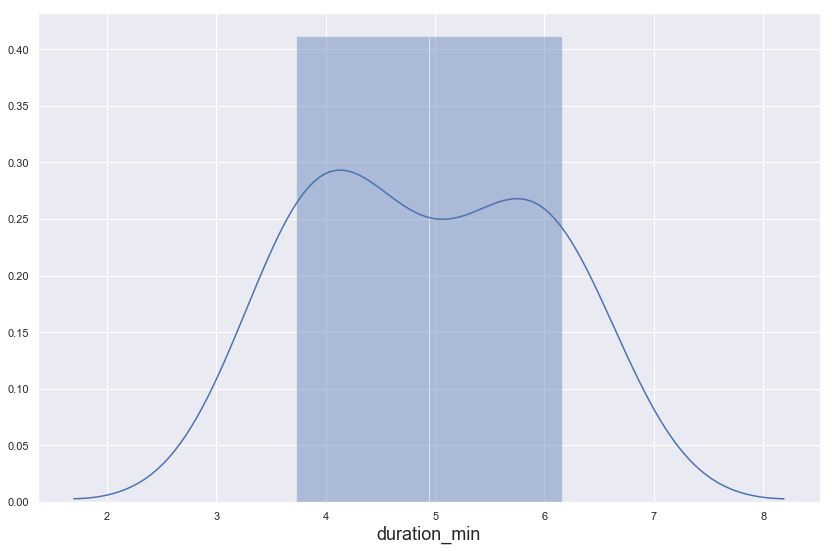

In [29]:
sns.distplot((df.duration_ms/1000.0)/60.0)
plt.xlabel('duration_min',fontsize=18)

### other features distributions

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


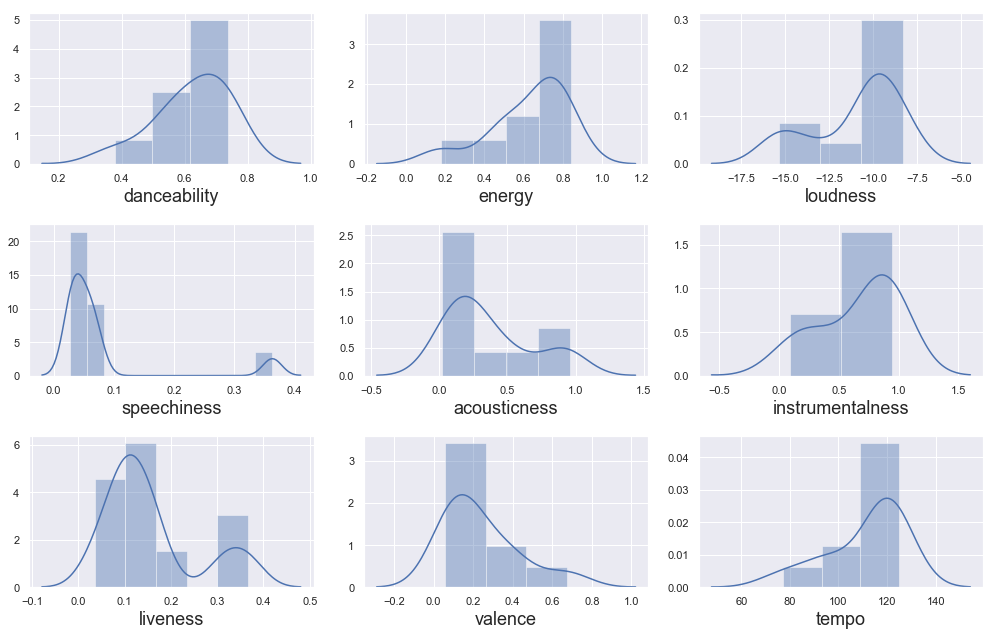

In [30]:
plt.subplot(331)
sns.distplot(df.danceability)
plt.xlabel('danceability', fontsize=18)

plt.subplot(332)
sns.distplot(df.energy)
plt.xlabel('energy', fontsize=18)

plt.subplot(333)
sns.distplot(df.loudness)
plt.xlabel('loudness', fontsize=18)

plt.subplot(334)
sns.distplot(df.speechiness)
plt.xlabel('speechiness', fontsize=18)

plt.subplot(335)
sns.distplot(df.acousticness)
plt.xlabel('acousticness', fontsize=18)

plt.subplot(336)
sns.distplot(df.instrumentalness)
plt.xlabel('instrumentalness', fontsize=18)

plt.subplot(337)
sns.distplot(df.liveness)
plt.xlabel('liveness', fontsize=18)

plt.subplot(338)
sns.distplot(df.valence)
plt.xlabel('valence', fontsize=18)

plt.subplot(339)
sns.distplot(df.tempo)
plt.xlabel('tempo', fontsize=18)

plt.tight_layout()
plt.show()


In [31]:
df.to_csv('bonobo_tracks_data.csv')